In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("./Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [4]:
df['item_date']=pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce').dt.date
df['quantity tons']=pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer']=pd.to_numeric(df['customer'], errors='coerce')
df['country']=pd.to_numeric(df['country'], errors='coerce')
df['application']=pd.to_numeric(df['application'], errors='coerce')
df['thichness']=pd.to_numeric(df['thickness'], errors='coerce')
df['width']=pd.to_numeric(df['width'], errors='coerce')
df['material_ref']=df['material_ref'].str.lstrip('0')
df['product_ref']=pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date']=pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price']=pd.to_numeric(df['selling_price'], errors='coerce')

In [5]:
df.head()


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,thichness
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,2.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,0.80
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,0.38
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,2.30
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,4.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
 14  thichness      181672 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 20.8+ MB


In [7]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,thichness
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,181672.000000
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03,2.564827
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05,6.572321
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03,0.180000
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02,0.700000
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02,1.500000
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02,3.000000
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08,2500.000000


In [80]:
df['product_ref'].min()

611728

In [81]:
df['product_ref'].max()

1722207579

In [10]:
df.shape

(181673, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
 14  thichness      181672 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 20.8+ MB


In [12]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
thichness            1
dtype: int64

In [13]:
df['material_ref']=df['material_ref'].fillna('Null')

In [14]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
thichness         1
dtype: int64

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
thichness        0
dtype: int64

In [17]:
df.shape

(181631, 15)

<Axes: >

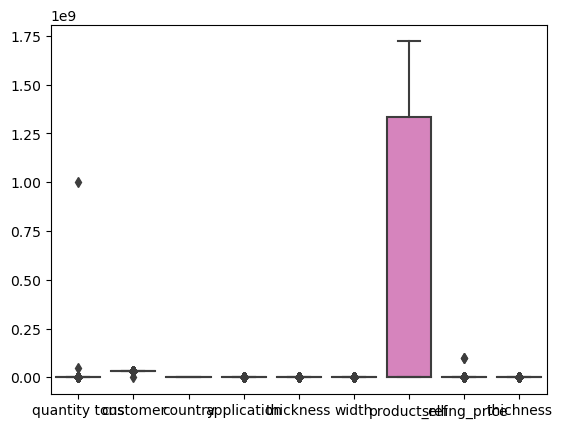

In [18]:
import seaborn as sns
sns.boxplot(data=df)

In [19]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'thichness'],
      dtype='object')

<Axes: xlabel='quantity tons'>

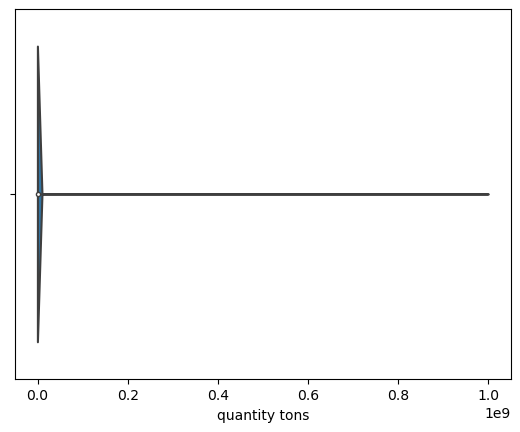

In [20]:
sns.violinplot(x=df['quantity tons'])

<Axes: xlabel='customer'>

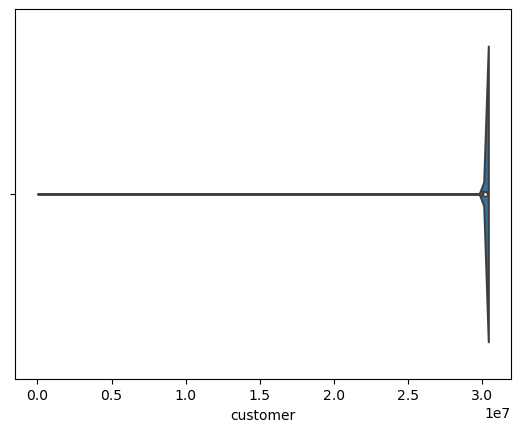

In [21]:
sns.violinplot(x=df['customer'])

<Axes: xlabel='country'>

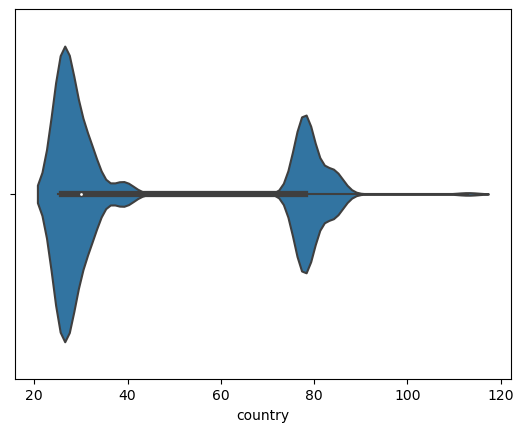

In [22]:
sns.violinplot(x=df['country'])

<Axes: xlabel='application'>

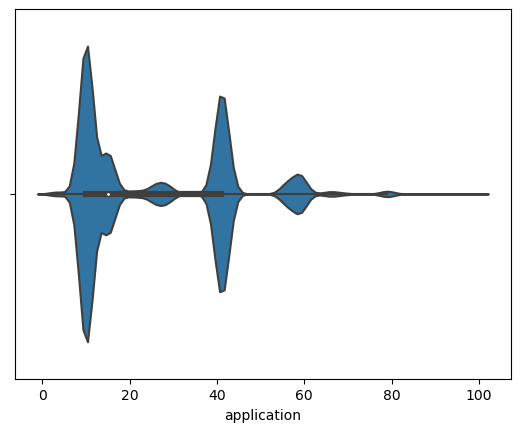

In [23]:
sns.violinplot(x=df['application'])

<Axes: xlabel='thickness'>

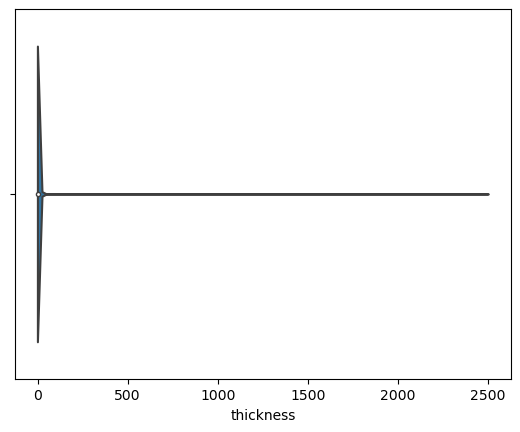

In [24]:
sns.violinplot(x=df['thickness'])

<Axes: xlabel='width'>

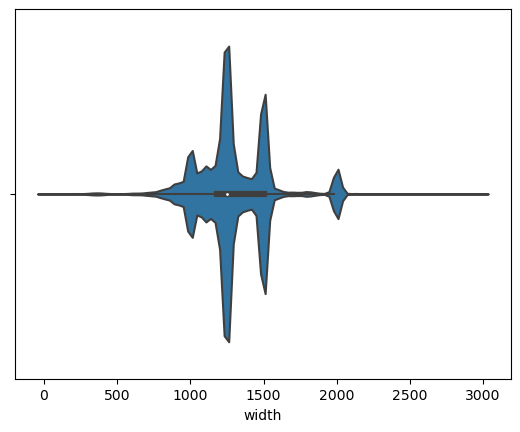

In [25]:
sns.violinplot(x=df['width'])

<Axes: xlabel='product_ref'>

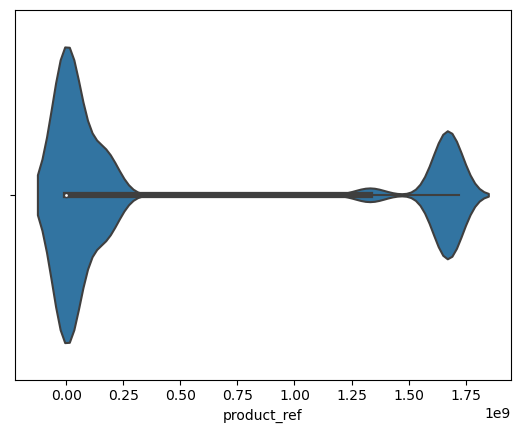

In [26]:
sns.violinplot(x=df['product_ref'])

<Axes: xlabel='selling_price'>

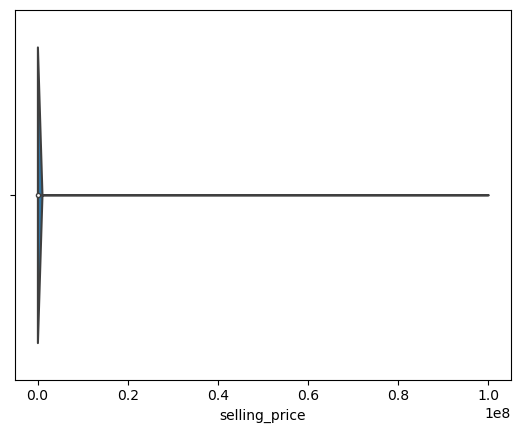

In [27]:
sns.violinplot(x=df['selling_price'])

<Axes: xlabel='quantity tons', ylabel='Density'>

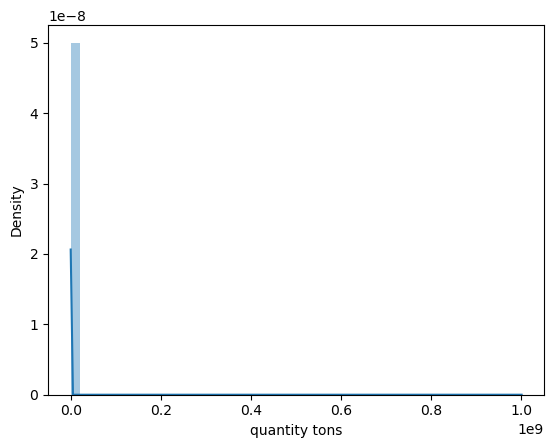

In [28]:
sns.distplot(df['quantity tons'], kde=True)

<Axes: xlabel='customer', ylabel='Density'>

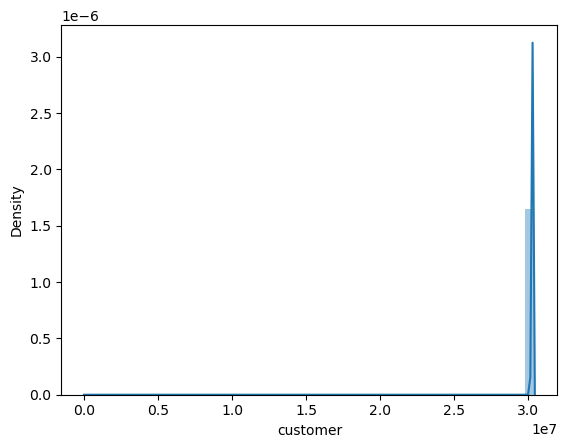

In [29]:
sns.distplot(df['customer'], kde=True)

<Axes: xlabel='country', ylabel='Density'>

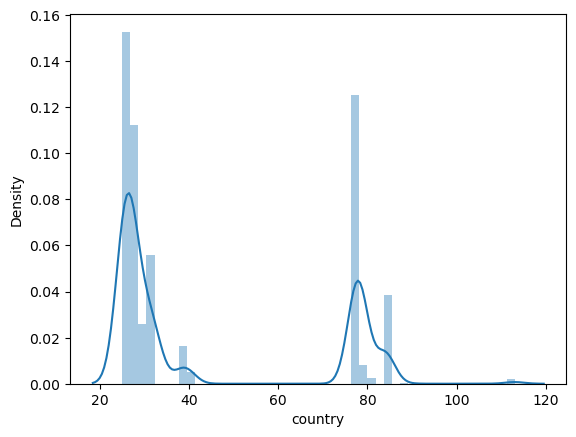

In [30]:
sns.distplot(df['country'], kde=True)

<Axes: xlabel='application', ylabel='Density'>

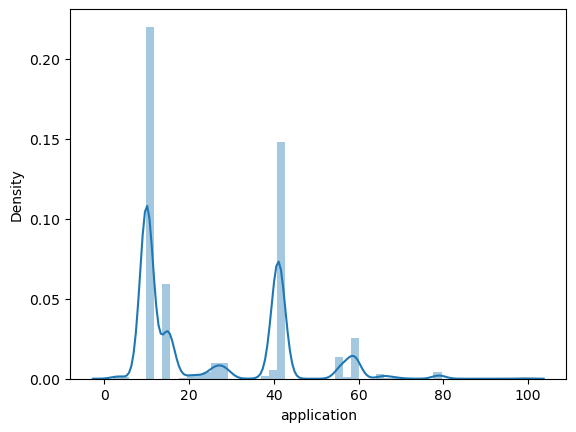

In [31]:
sns.distplot(df['application'], kde=True)

<Axes: xlabel='thickness', ylabel='Density'>

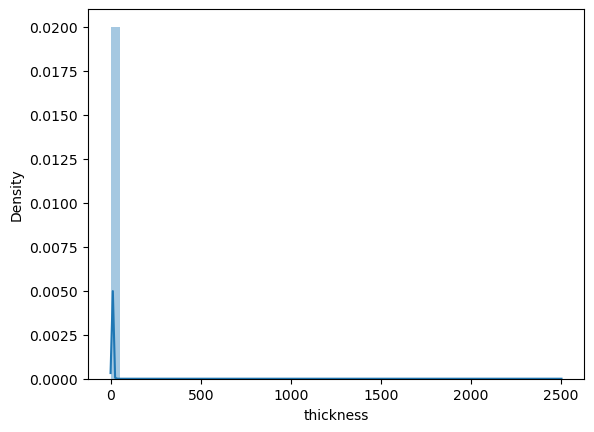

In [32]:
sns.distplot(df['thickness'], kde=True)

<Axes: xlabel='width', ylabel='Density'>

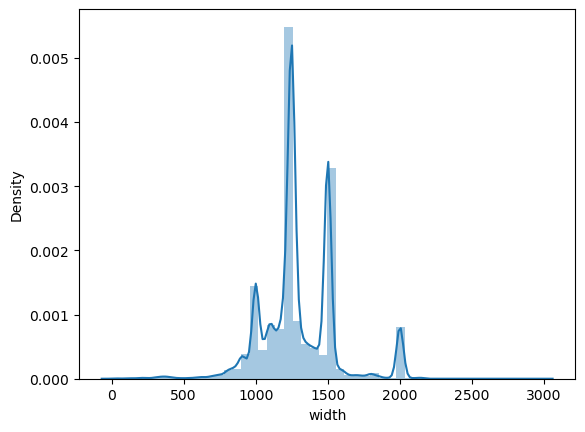

In [33]:
sns.distplot(df['width'],kde=True)

<Axes: xlabel='product_ref', ylabel='Density'>

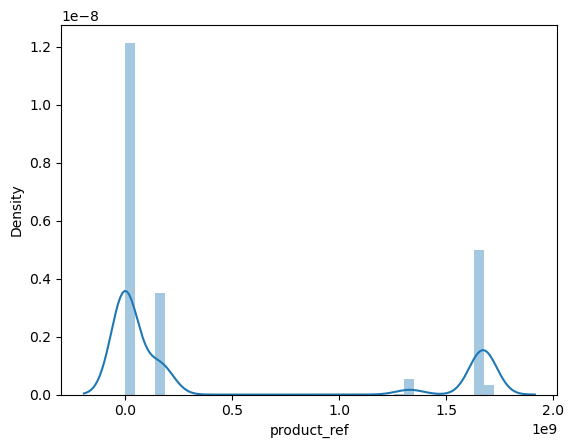

In [34]:
sns.distplot(df['product_ref'], kde=True)

<Axes: xlabel='selling_price', ylabel='Density'>

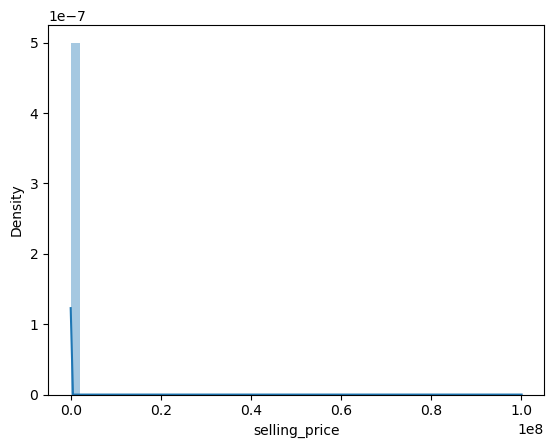

In [35]:
sns.distplot(df['selling_price'], kde=True)

# Regression and Classification Categorisation

# Regression

In [53]:
rdf=df.copy() 

In [54]:
a=rdf['quantity tons']<=0
#print(a)
print(a.sum())
rdf.loc[a,'quantity tons']=np.nan

a=rdf['thickness']<=0
print(a.sum())

a=rdf['selling_price']<=0
print(a.sum())
rdf.loc[a,'selling_price']=np.nan

4
0
7


In [55]:
rdf.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
thichness        0
dtype: int64

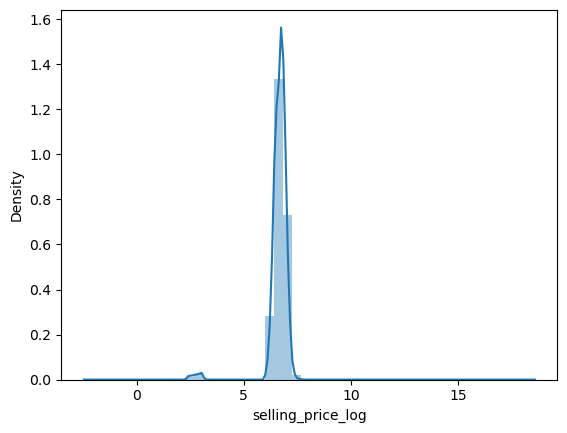

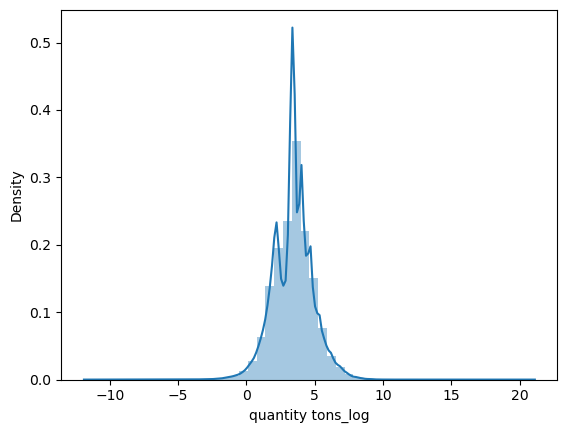

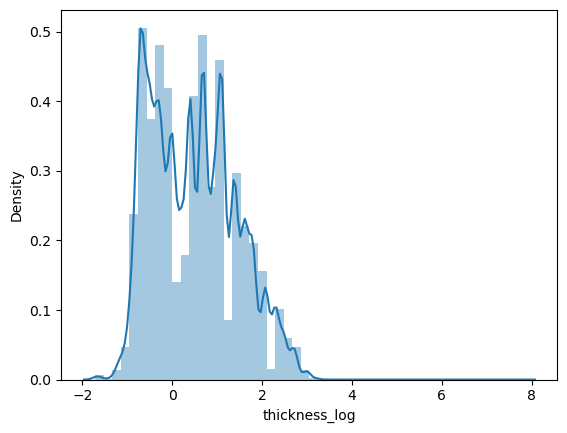

In [56]:
rdf['selling_price_log'] = np.log(rdf['selling_price'])
sns.distplot(rdf['selling_price_log'])
plt.show()

rdf['quantity tons_log'] = np.log(rdf['quantity tons'])
sns.distplot(rdf['quantity tons_log'])
plt.show()

rdf['thickness_log'] = np.log(rdf['thickness'])
sns.distplot(rdf['thickness_log'])
plt.show()

# Preprocessing

In [57]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [58]:
rc=df.copy()

In [59]:
rc['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [60]:
rdf['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [61]:
rc['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [62]:
rdf['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [63]:
df['material_ref'].unique()

array(['DEQ1 S460MC', '104991', 'S0380700', ..., 'MAS65550',
       '4.11043_1060X5_BRE', '202006170005.IO.1.1'], dtype=object)

In [64]:
rdf['status']=oe.fit_transform(rdf[['status']])


In [65]:
rdf['item type']=oe.fit_transform(rdf[['item type']])

In [66]:
rdf['material_ref'].unique()

array(['DEQ1 S460MC', '104991', 'S0380700', ..., 'MAS65550',
       '4.11043_1060X5_BRE', '202006170005.IO.1.1'], dtype=object)

In [67]:
rdf=rdf.dropna()

In [68]:
rdf.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,thichness,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,7.0,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,2.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,7.0,5.0,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,0.80,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,7.0,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,0.38,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,7.0,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,2.30,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,7.0,5.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,4.00,6.357842,6.666354,1.386294


In [69]:
x=rdf[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=rdf['selling_price_log']

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [45]:
ss.fit_transform(x)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [47]:
print(x_train.shape, y_train.shape)

(127134, 9) (127134,)


In [48]:
print(x_test.shape, y_test.shape)

(54486, 9) (54486,)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Linear Regression

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)
lr_training_score=lr.score(x_train,y_train)
lr_testing_score=lr.score(x_test,y_test)
print("Linear Regression Training Score :",lr_training_score)
print("Linear Regression Testing Score :",lr_testing_score)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Root Mean Squared Error (RMSE):", lr_rmse)
print("Linear Regression R2 Score:", lr_r2)

Linear Regression Training Score : 0.08385746206265177
Linear Regression Testing Score : 0.08353298545138121
Linear Regression Mean Absolute Error: 0.26977731015919193
Linear Regression Mean Squared Error: 0.2879533588129296
Linear Regression Root Mean Squared Error (RMSE): 0.5366128574800735
Linear Regression R2 Score: 0.08353298545138121


In [51]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)
dt_training_score=dt.score(x_train,y_train)
dt_testing_score=dt.score(x_test,y_test)
print("Decision Tree Training Score :",dt_training_score)
print("Decision Tree Testing Score :",dt_testing_score)
print("Decision Tree Mean Absolute Error:", dt_mae)
print("Decision Tree Mean Squared Error:", dt_mse)
print("Decision Tree Root Mean Squared Error (RMSE):", dt_rmse)
print("Decision Tree R2 Score:", dt_r2)

Decision Tree Training Score : 1.0
Decision Tree Testing Score : 0.8679538794701309
Decision Tree Mean Absolute Error: 0.12519791206010866
Decision Tree Mean Squared Error: 0.04148880791254666
Decision Tree Root Mean Squared Error (RMSE): 0.20368801612403872
Decision Tree R2 Score: 0.8679538794701309


In [52]:
rf=RandomForestRegressor(random_state=1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)
rf_training_score=rf.score(x_train,y_train)
rf_testing_score=rf.score(x_test,y_test)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Root Mean Squared Error (RMSE):", rf_rmse)
print("Random Forest R2 Score:", rf_r2)
print("Random Forest Training Score :",rf.score(x_train,y_train))
print("Random Forest Testing Score :",rf.score(x_test,y_test))

Random Forest Mean Absolute Error: 0.1063938287157271
Random Forest Mean Squared Error: 0.022785523386146082
Random Forest Root Mean Squared Error (RMSE): 0.15094874423507498
Random Forest R2 Score: 0.9274806840985826
Random Forest Training Score : 0.9898212993185388
Random Forest Testing Score : 0.9274806840985826


In [53]:
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
ab_pred=ab.predict(x_test)
ab_mae = mean_absolute_error(y_test, ab_pred)
ab_mse = mean_squared_error(y_test, ab_pred)
ab_rmse = np.sqrt(ab_mse)
ab_r2 = r2_score(y_test, ab_pred)
ab_training_score=ab.score(x_train,y_train)
ab_testing_score=ab.score(x_test,y_test)

print("Ada Boost Mean Absolute Error:", ab_mae)
print("Ada Boost Mean Squared Error:", ab_mse)
print("Ada Boost Root Mean Squared Error (RMSE):", ab_rmse)
print("Ada Boost R2 Score:", ab_r2)
print("Ada Boost Training Score :",ab.score(x_train,y_train))
print("Ada Boost Testing Score :",ab.score(x_test,y_test))

Ada Boost Mean Absolute Error: 0.18975384505148102
Ada Boost Mean Squared Error: 0.05891114114936472
Ada Boost Root Mean Squared Error (RMSE): 0.24271617405802343
Ada Boost R2 Score: 0.8125039489888863
Ada Boost Training Score : 0.8232909682293426
Ada Boost Testing Score : 0.8125039489888863


In [54]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_pred)
gb_training_score=gb.score(x_train,y_train)
gb_testing_score=gb.score(x_test,y_test)
print("Gradient Boost Mean Absolute Error:", gb_mae)
print("Gradient Boost Mean Squared Error:", gb_mse)
print("Gradient Boost Root Mean Squared Error (RMSE):", gb_rmse)
print("Gradient Boost R2 Score:", gb_r2)
print("Gradient Boost Training Score:",gb.score(x_train,y_train))
print("Gradient Boost Testing Score:",gb.score(x_test,y_test))

Gradient Boost Mean Absolute Error: 0.15422269110478773
Gradient Boost Mean Squared Error: 0.03499973203667608
Gradient Boost Root Mean Squared Error (RMSE): 0.18708215317521892
Gradient Boost R2 Score: 0.8886066130227271
Gradient Boost Training Score: 0.894068367623351
Gradient Boost Testing Score: 0.8886066130227271


In [55]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred=et.predict(x_test)
et_mae = mean_absolute_error(y_test, et_pred)
et_mse = mean_squared_error(y_test, et_pred)
et_rmse = np.sqrt(et_mse)
et_r2 = r2_score(y_test, et_pred)
et_training_score=et.score(x_train,y_train)
et_testing_score=et.score(x_test,y_test)
print("Extra Tree Mean Absolute Error:", et_mae)
print("Extra Tree Mean Squared Error:", et_mse)
print("Extra Tree Root Mean Squared Error (RMSE):", et_rmse)
print("Extra Tree R2 Score:", et_r2)
print("Extra Tree Training Score:",et.score(x_train,y_train))
print("Extra Tree Testing Score:",et.score(x_test,y_test))

Extra Tree Mean Absolute Error: 0.11298041129620759
Extra Tree Mean Squared Error: 0.030188870382629386
Extra Tree Root Mean Squared Error (RMSE): 0.17374944714337764
Extra Tree R2 Score: 0.9039181066467863
Extra Tree Training Score: 1.0
Extra Tree Testing Score: 0.9039181066467863


In [56]:
rmse=[lr_rmse,dt_rmse,rf_rmse,ab_rmse,gb_rmse,et_rmse]
r2=[lr_r2,dt_r2,rf_r2,ab_r2,gb_r2,et_r2]


In [57]:
print(rmse,r2)

[0.5366128574800735, 0.20368801612403872, 0.15094874423507498, 0.24271617405802343, 0.18708215317521892, 0.17374944714337764] [0.08353298545138121, 0.8679538794701309, 0.9274806840985826, 0.8125039489888863, 0.8886066130227271, 0.9039181066467863]


In [58]:
model_names=['Linear','Decision','Random','Ada','Gradient','Extra']

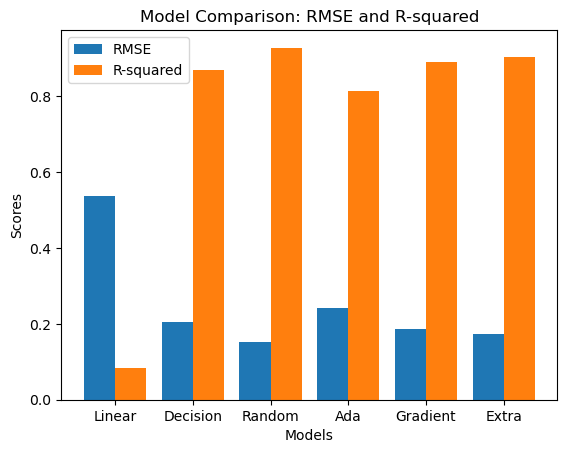

In [59]:
x_labels = np.arange(len(model_names))

# Plot RMSE scores
plt.bar(x_labels - 0.2, rmse, width=0.4, label="RMSE")
# Plot R2 scores
plt.bar(x_labels + 0.2, r2, width=0.4, label="R-squared")

# Set x-axis labels
plt.xticks(x_labels, model_names)

# Add labels and legend
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Comparison: RMSE and R-squared")
plt.legend()

# Show the plot
plt.show()

In [60]:
import pickle

# Assuming you have a trained model called 'model'
model_filename = 'rf_reg.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)


In [61]:
#[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
# quantity tons	customer	country	status	item type	application	thickness	width	material_ref	product_ref	delivery date	selling_price	thichness	selling_price_log	quantity tons_log	thickness_log
# 768.024839	30202938.0	25.0	7.0 	   5.0  	41.0    	0.80    	1210.0 	104991      	1668701718	2021-04-01  	1047.00     	0.80    	6.953684        	6.643822        	-0.223144
input_data=[[np.log(float(768.024839)),7.0, 5.0, 41.0,np.log(float(0.80)),1210.0,25.0,30202938.0,1668701718 ]]


In [62]:
ss_input_data=ss.transform(input_data)

In [63]:
ss_input_data

array([[ 2.25042993,  0.70620108,  0.82144631,  0.8665426 , -0.75339772,
        -0.32589119, -0.81517858, -0.29403459,  1.66498251]])

In [64]:
with open('rf_reg.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [65]:
prediction=loaded_model.predict(ss_input_data)

In [66]:
Output=np.exp(prediction)
Output

array([1207.01572564])

# Classification


In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
cdf=df.copy()

In [120]:
cdf = df[df['status'].isin(['Won', 'Lost'])]
len(cdf)

150435

In [121]:
cdf.status.value_counts()

Won     116004
Lost     34431
Name: status, dtype: int64

In [122]:
cdf['status']=oe.fit_transform(cdf[['status']])
(cdf['status']==0).sum()

34431

In [123]:
cdf['item type']=oe.fit_transform(cdf[['item type']])

In [124]:
x = cdf[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = cdf['status']

In [125]:
ss=StandardScaler()
ss.fit_transform(x)

array([[-0.09139439,  0.09705592,  0.76978981, ..., -0.71017265,
        -0.72507203,  1.6673573 ],
       [ 1.52755772,  0.76054292,  0.76978981, ..., -0.83268141,
        -0.2835426 ,  1.66443363],
       [ 0.66147626, -0.62373848,  1.72295071, ..., -0.62850015,
        -0.74727633, -0.66115687],
       ...,
       [-0.20459491, -0.71081685,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [-4.74988274, -0.77269647,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [ 0.70809988, -0.75206993,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041]])

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [127]:
smote = SMOTE(sampling_strategy='auto', random_state=1)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [128]:
x_resampled.shape,x_test.shape,y_resampled.shape,y_test.shape

((185806, 9), (30087, 9), (185806,), (30087,))

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [130]:
lr=LogisticRegression()
lr.fit(x_resampled,y_resampled)
lr_pred=lr.predict(x_test)
lr_acc=accuracy_score(lr_pred,y_test)
print("Logistic Regression Accuracy:",lr_acc)

Logistic Regression Accuracy: 0.6483198723701267


In [131]:
dt=DecisionTreeClassifier()
dt.fit(x_resampled,y_resampled)
dt_pred=dt.predict(x_test)
dt_acc=accuracy_score(dt_pred,y_test)
print("Decision Tree Accuracy:",dt_acc)

Decision Tree Accuracy: 0.9080333698939741


In [132]:
rf=RandomForestClassifier()
rf.fit(x_resampled,y_resampled)
rf_pred=rf.predict(x_test)
rf_acc=accuracy_score(rf_pred,y_test)
print("Random Forest Accuracy:",rf_acc)

Random Forest Accuracy: 0.9347891115764284


In [133]:
ab=AdaBoostClassifier()
ab.fit(x_resampled,y_resampled)
ab_pred=ab.predict(x_test)
ab_acc=accuracy_score(ab_pred,y_test)
print("Ada Boost Accuracy:",ab_acc)

Ada Boost Accuracy: 0.7373616512114867


In [134]:
gb=GradientBoostingClassifier()
gb.fit(x_resampled,y_resampled)
gb_pred=gb.predict(x_test)
gb_acc=accuracy_score(gb_pred,y_test)
print("Gradient Boost Accuracy:",gb_acc)

Gradient Boost Accuracy: 0.7691694087147273


In [135]:
et=ExtraTreesClassifier()
et.fit(x_resampled,y_resampled)
et_pred=et.predict(x_test)
et_acc=accuracy_score(et_pred,y_test)
print("Extra Tree Accuracy:",et_acc)

Extra Tree Accuracy: 0.9332934489979061


In [136]:
acc=[lr_acc,dt_acc,rf_acc,ab_acc,gb_acc,et_acc]
acc
max(acc)

0.9347891115764284

In [137]:
model_names=['LR','DT','RF','AB','GB','ET']

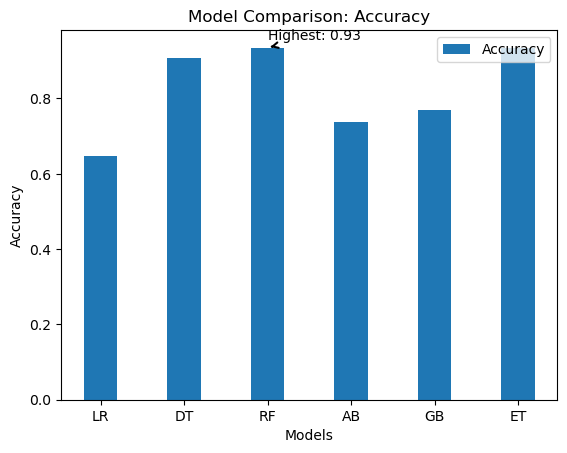

In [138]:

# Find the index of the model with the highest accuracy
best_model_index = np.argmax(acc)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot RMSE scores
bars = plt.bar(np.arange(len(model_names)), acc, width=0.4, label="Accuracy")

# Annotate the bar with the highest accuracy
highest_accuracy = max(acc)
ax.annotate(f'Highest: {highest_accuracy:.2f}', xy=(best_model_index, highest_accuracy), xytext=(best_model_index, highest_accuracy + 0.02),
            arrowprops=dict(arrowstyle='->', lw=1.5))

# Set x-axis labels
plt.xticks(np.arange(len(model_names)), model_names)

# Add labels and legend
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy")
plt.legend()

# Show the plot
plt.show()

In [139]:
import pickle

# Assuming you have a trained model called 'model'
model_filename = 'rf_clas.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)


In [140]:
#'quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref'
# # quantity tons	customer	country	status	item type	application	thickness	width	material_ref	product_ref	delivery date	selling_price	thichness	selling_price_log	quantity tons_log	thickness_log
#    768.024839 	30202938.0	25.0	7.0 	   5.0  	41.0    	0.80    	1210.0 	104991      	1668701718	2021-04-01  	1047.00     	0.80    	6.953684        	6.643822        	-0.223144
input_data=[[768.0244839, 1047.00,5.0,41.0,0.80,1210.0, 25.0, 30202938,1668701718]]# Won Sample Input
input_data=[[39.553513,1225.0,3.0,10.0,1.00,1500.0,77.0,30165992.0,164141591]] # Lost Sample Input


In [141]:
ss_input_data=ss.transform(input_data)
ss_input_data

array([[-0.12449948,  1.37246357, -1.13653199, -0.86140115, -0.22743095,
         0.75953852,  1.29080371, -0.63337631, -0.43319041]])

In [142]:
with open('rf_clas.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [143]:
prediction=loaded_model.predict(ss_input_data)

In [144]:
prediction

array([1.])

In [145]:
print("Won" if prediction[0]==1 else "Loss")

Won


In [105]:
lost_rows = cdf[cdf['status'] == 0]
lost_rows

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,thichness
171,C0BF3187-C4B3-4C63-ABDB-FCB0642A69C0,2021-04-01,8.718789,30223403.0,78.0,0.0,5.0,10.0,1.00,1500.0,Null,1668701718,2021-07-01,1253.0,1.00
174,66D8E20C-AF4A-47D7-8FDD-51DEA6EA1F05,2021-04-01,39.553513,30165992.0,77.0,0.0,3.0,10.0,1.00,1500.0,FZPA004640,164141591,2021-08-01,1225.0,1.00
175,4532B5EF-0446-4880-BC8E-242E89AB8DD6,2021-04-01,11.454558,30223403.0,78.0,0.0,5.0,10.0,4.00,1500.0,Null,1668701718,2021-07-01,1186.0,4.00
176,EE0BA8DE-38E9-4101-ADF9-B7B5B19A3525,2021-04-01,37.655526,30165992.0,77.0,0.0,3.0,10.0,0.80,1250.0,FZPA004640,164141591,2021-08-01,1249.0,0.80
179,1CDD04C3-6310-431F-B10A-F1C6B4F529DD,2021-04-01,10.291602,30223403.0,78.0,0.0,5.0,10.0,0.80,1500.0,Null,1668701718,2021-07-01,1284.0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181527,A30A09D6-6527-4BE3-B2EC-B795F94A70DD,2020-07-02,63.859521,30161559.0,30.0,0.0,3.0,10.0,5.85,1525.0,Null,640665,2020-08-01,457.0,5.85
181529,BD9B7299-6FD2-4A9F-B336-5F677794A03F,2020-07-02,56.028562,30161559.0,30.0,0.0,3.0,10.0,7.85,1500.0,Null,640665,2020-08-01,458.0,7.85
181531,BF93A919-5970-428F-9467-7A2D0573C5C6,2020-07-02,206.224110,30161559.0,30.0,0.0,3.0,10.0,3.85,1830.0,Null,640665,2020-08-01,460.0,3.85
181533,FA54AED7-360E-4DED-96AA-F69D127267B8,2020-07-02,102.993849,30198408.0,25.0,0.0,3.0,10.0,1.40,1150.0,Null,1668701718,2020-07-01,725.0,1.40


In [106]:
(y_test==0).sum()

6986

In [107]:
(y_resampled==0).sum()

92903

In [108]:
(y_resampled==1).sum()

92903

In [109]:
y_train.shape

(120348,)

In [110]:
((rf_pred==y_test)==False).sum()

1953